<a href="https://colab.research.google.com/github/firdatlnr/Tubes_360-392/blob/main/360_392_UTS_AI_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Firdatul Nurul Ramadha (201910370311360)
Sylvia Nella Ayuningtyas (201910370311392)
UTS Kecerdasan Buatan H

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
base_dir = '/content/gdrive/splitted/train'
!ls "/content/gdrive/splitted/train"

ls: cannot access '/content/gdrive/splitted/train': No such file or directory


In [ ]:
# menentukan direktori
bahan_dir = os.path.join(base_dir, 'bahan')
train_dir = os.path.join(base_dir, 'latih')
validation_dir = os.path.join(base_dir, 'validasi')

In [ ]:
#menentukan direktori isi bahan
jeruk_dir = os.path.join(bahan_dir, 'jeruk/')
nangka_dir = os.path.join(bahan_dir, 'nangka/')

print('Jumlah Data Train Tiap Kelas')
print('Jumlah gambar jeruk: ', len(os.listdir(jeruk_dir)))
print('Jumlah gambar nangka: ', len(os.listdir(nangka_dir)))

Jumlah Data Train Tiap Kelas


FileNotFoundError: ignored

In [ ]:
#Direktori isi latih/training
train_jeruk = os.path.join(train_dir, 'jeruk/')
train_nangka = os.path.join(train_dir, 'nangka/')

validation_jeruk = os.path.join(validation_dir, 'jeruk/')
validation_nangka = os.path.join(validation_dir, 'nangka/')

Menyiapkan Dataset

In [ ]:
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)
  
  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)

#Jumlah pembagian data training dan testing
train_ratio = 0.9

#Pembagian training dan validasi
#Buat Training
source_00 = jeruk_dir
train_00 = train_jeruk
val_00 = validation_jeruk
train_val_split(source_00, train_00, val_00, train_ratio)

#Buat Validasi
source_01 = nangka_dir
train_01 = train_nangka
val_01 = validation_nangka
train_val_split(source_01, train_01, val_01, train_ratio)

In [ ]:
print('Jumlah All jeruk :', len(os.listdir(jeruk_dir)))
print('Jumlah Train jeruk :', len(os.listdir(train_dir)))
print('Jumlah Val jeruk :', len(os.listdir(validation_dir)))

Jumlah All jeruk : 50
Jumlah Train jeruk : 2
Jumlah Val jeruk : 2


Pre Processing

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    bahan_dir,
    target_size = (150, 150),
    batch_size = 10, 
    class_mode = 'categorical'
)
val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 10, 
    class_mode = 'categorical'
)

Found 100 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):
      print('\n Akurasi mencapai 99%')
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(200, activation = 'relu'),
      tf.keras.layers.Dropout(0.3, seed = 112),
      tf.keras.layers.Dense(500, activation = 'relu'),
      tf.keras.layers.Dropout(0.5, seed = 112),
      tf.keras.layers.Dense(2, activation = 'sigmoid')
])

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 6,
    epochs = 25,
    validation_data = val_generator,
    validation_steps = 1,
    verbose = 1,
    callbacks = [callbacks]
)

Epoch 1/25
6/6 [==============================] - 5s 763ms/step - loss: 0.7850 - accuracy: 0.4000 - val_loss: 0.7673 - val_accuracy: 0.3000
Epoch 2/25
6/6 [==============================] - 4s 659ms/step - loss: 0.6811 - accuracy: 0.5333 - val_loss: 0.7921 - val_accuracy: 0.2000
Epoch 3/25
6/6 [==============================] - 4s 649ms/step - loss: 0.6903 - accuracy: 0.5500 - val_loss: 0.6257 - val_accuracy: 0.9000
Epoch 4/25
6/6 [==============================] - 4s 657ms/step - loss: 0.5878 - accuracy: 0.7667 - val_loss: 0.4112 - val_accuracy: 0.9000
Epoch 5/25
6/6 [==============================] - 4s 642ms/step - loss: 0.3468 - accuracy: 0.9167 - val_loss: 0.2246 - val_accuracy: 0.9000
Epoch 6/25
6/6 [==============================] - 4s 667ms/step - loss: 0.1304 - accuracy: 0.9500 - val_loss: 0.0548 - val_accuracy: 1.0000
Epoch 7/25
6/6 [==============================] - 4s 661ms/step - loss: 0.1908 - accuracy: 0.9333 - val_loss: 0.0200 - val_accuracy: 1.0000
Epoch 8/25
6/6 [====

In [ ]:
model.metrics_names

['loss', 'accuracy']

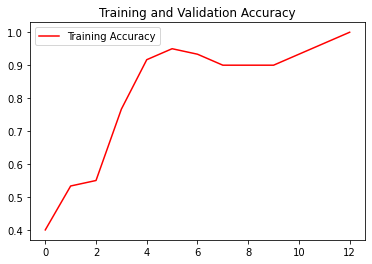

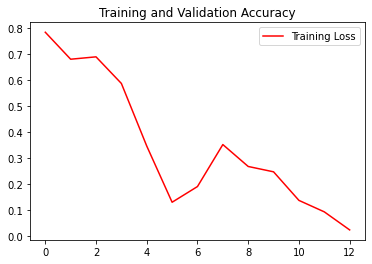

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
#val_acc = history.history['val_acccuracy']

loss = history.history['loss']
#val_loss = history.history['val_loss'] 
 
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
#plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
#plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 'best')
plt.show()

Saving 001.jpg to 001.jpg
001.jpg
Gambar ini terdeteksi kelas nangka


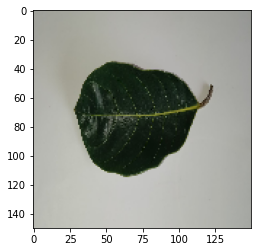

In [ ]:
import numpy as np 
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn 
  img = image.load_img(path, target_size = (150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = os.listdir(bahan_dir)

  for j in range(49):
    if classes[0][j] == 1. :
      print('Gambar ini terdeteksi kelas', class_list[j-1])
      break